In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

In [2]:
cust=pd.read_csv('customer.csv')
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [3]:
prod=pd.read_csv('prod_cat_info.csv')
prod.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [4]:
tran=pd.read_csv('transactions.csv')
tran

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [5]:
# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
# keep all customers who have done transactions with us and select the join type accordingly.

In [5]:
merge1=pd.merge(tran,cust,how='inner',left_on='cust_id',right_on='customer_Id')
merge1.drop('customer_Id',axis=1,inplace=True)
merge1

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,26-09-1981,M,5.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,26-09-1981,M,5.0
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,26-09-1981,M,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,16293185603,274931,31-01-2011,8,3,3,137,43.155,454.155,Flagship store,10-06-1972,M,10.0
23049,70163958026,267902,30-01-2011,10,5,4,404,169.680,1785.680,e-Shop,17-07-1975,M,4.0
23050,20417144530,269556,29-01-2011,10,6,3,654,206.010,2168.010,Flagship store,27-12-1972,M,5.0
23051,58531412371,274935,29-01-2011,10,5,4,104,43.680,459.680,Flagship store,09-09-1977,F,3.0


In [6]:
merge2=pd.merge(merge1,prod,how='inner',left_on=['prod_cat_code','prod_subcat_code'],
                right_on=['prod_cat_code','prod_sub_cat_code'])
merge2.drop('prod_sub_cat_code',axis=1,inplace=True)
merge2

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


In [7]:
df=merge2
df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women


In [ ]:
# 2. Prepare a summary report for the merged data set.
# a. Get the column names and their corresponding data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
transaction_id      23053 non-null int64
cust_id             23053 non-null int64
tran_date           23053 non-null object
prod_subcat_code    23053 non-null int64
prod_cat_code       23053 non-null int64
Qty                 23053 non-null int64
Rate                23053 non-null int64
Tax                 23053 non-null float64
total_amt           23053 non-null float64
Store_type          23053 non-null object
DOB                 23053 non-null object
Gender              23044 non-null object
city_code           23045 non-null float64
prod_cat            23053 non-null object
prod_subcat         23053 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


In [9]:
# b. Top/Bottom 10 observations
df.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
5,4737317330,269345,29-07-2011,1,1,5,1141,599.025,6304.025,MBR,26-06-1970,F,10.0,Clothing,Women
6,44425889101,274987,18-03-2012,1,1,4,897,376.740,3964.740,Flagship store,08-10-1983,M,2.0,Clothing,Women
7,90501340928,271817,19-02-2012,1,1,1,1122,117.810,1239.810,TeleShop,24-12-1989,M,8.0,Clothing,Women
8,99335419136,268755,13-12-2012,1,1,3,1181,372.015,3915.015,e-Shop,15-07-1984,F,8.0,Clothing,Women
9,35030444164,268129,18-11-2011,1,1,5,1047,549.675,5784.675,MBR,07-08-1982,F,9.0,Clothing,Women


In [10]:
df.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,3387244829,269114,15-07-2011,4,4,1,388,40.740,428.740,e-Shop,22-01-1989,F,5.0,Bags,Women
23044,76906459516,267940,15-06-2011,4,4,2,1263,265.230,2791.230,Flagship store,09-06-1979,M,9.0,Bags,Women
23045,73549617163,271334,5/7/2011,4,4,5,263,138.075,1453.075,e-Shop,08-12-1983,F,10.0,Bags,Women
23046,75339646315,274827,2/5/2011,4,4,4,1381,580.020,6104.020,e-Shop,27-12-1988,F,8.0,Bags,Women
23047,6650926717,268110,5/4/2011,4,4,4,1036,435.120,4579.120,MBR,06-03-1976,M,2.0,Bags,Women
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,21-01-1984,F,4.0,Bags,Women


In [ ]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [11]:
cont_col=df[['Qty','Rate','Tax','total_amt']]
cont_col.head()

,Qty,Rate,Tax,total_amt
0,-5,-772,405.300,-4265.300
1,5,772,405.300,4265.300
2,3,1229,387.135,4074.135
3,-4,-284,119.280,-1255.280
4,4,284,119.280,1255.280


In [12]:
def cont_var_summary(x):
    return pd.Series([  x.min(),x.quantile(0.25), x.median(),x.quantile(0.75), x.max()], 
                  index = ['MIN','Q1', 'MEDIAN', 'Q3', 'MAX'])

In [13]:
cont_col.apply(cont_var_summary).T

,MIN,Q1,MEDIAN,Q3,MAX
Qty,-5.000,1.00,3.00,4.000,5.0
Rate,-1499.000,312.00,710.00,1109.000,1500.0
Tax,7.350,98.28,199.08,365.715,787.5
total_amt,-8270.925,762.45,1754.74,3569.150,8287.5


In [ ]:
# d. Frequency tables for all the categorical variables

In [14]:
catg_col=df[['Store_type','Gender','city_code','prod_cat','prod_subcat']]
catg_col.head()

,Store_type,Gender,city_code,prod_cat,prod_subcat
0,e-Shop,M,5.0,Clothing,Women
1,e-Shop,M,5.0,Clothing,Women
2,Flagship store,M,3.0,Clothing,Women
3,Flagship store,M,1.0,Clothing,Women
4,Flagship store,M,1.0,Clothing,Women


In [15]:
catg_col.apply(lambda x:x.value_counts()).T.stack()

Store_type   Flagship store          4577.0
             MBR                     4661.0
             TeleShop                4504.0
             e-Shop                  9311.0
Gender       F                      11233.0
             M                      11811.0
city_code    1.0                     2258.0
             2.0                     2270.0
             3.0                     2411.0
             4.0                     2422.0
             5.0                     2360.0
             6.0                     2127.0
             7.0                     2356.0
             8.0                     2330.0
             9.0                     2178.0
             10.0                    2333.0
prod_cat     Bags                    1998.0
             Books                   6069.0
             Clothing                2960.0
             Electronics             4898.0
             Footwear                2999.0
             Home and kitchen        4129.0
prod_subcat  Academic           

In [ ]:
# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

C:\Users\TanujKhera\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\TanujKhera\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\TanujKhera\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\TanujKhera\Anaconda3\lib\site-packages\pa

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4B6996208>,
      dtype=object)

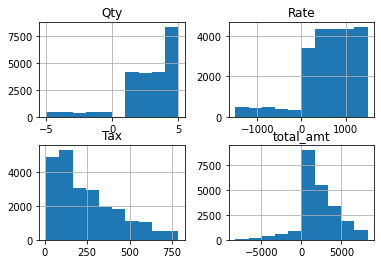

In [16]:
cont_col.hist()

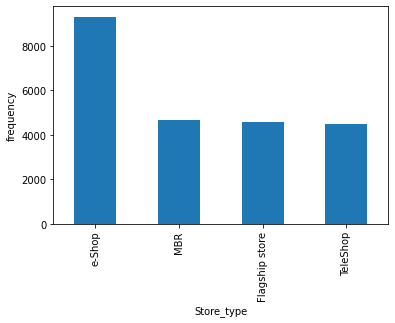

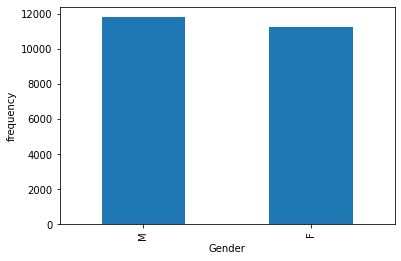

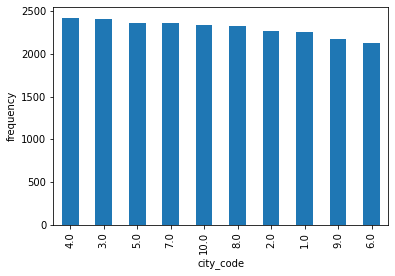

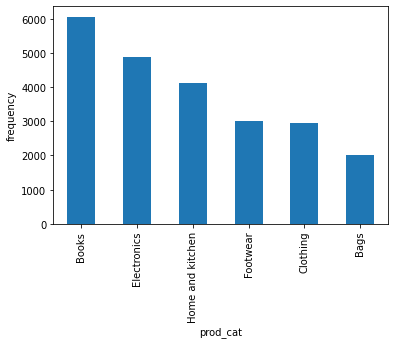

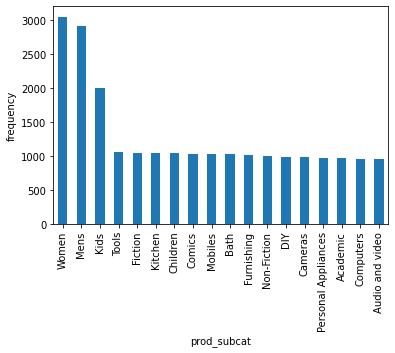

In [17]:
for i in ['Store_type','Gender','city_code','prod_cat','prod_subcat']:
    catg_col[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.show()

In [18]:
# 4. Calculate the following information using the merged dataset :
# a. Time period of the available transaction data

In [18]:
df.tran_date=df.tran_date.astype('datetime64[ns]')

In [19]:
diff=max(df.tran_date)-min(df.tran_date)
print("Time period of the available transaction data in days is ",diff.days)

Time period of the available transaction data in days is  1430


In [49]:
# b. Count of transactions where the total amount of transaction was negative

In [20]:
neg_amt=df[df.total_amt<0]
print("No. of negative transactions are ",len(neg_amt.axes[0]))

No. of negative transactions are  2177


In [ ]:
# 5. Analyze which product categories are more popular among females vs male customers.

In [21]:
#df[['Gender', 'prod_cat']].groupby(['Gender','prod_cat']).size()
df[['prod_cat', 'Gender']].groupby(['prod_cat', 'Gender']).size()

prod_cat          Gender
Bags              F          994
                  M         1004
Books             F         2949
                  M         3116
Clothing          F         1439
                  M         1518
Electronics       F         2328
                  M         2570
Footwear          F         1529
                  M         1469
Home and kitchen  F         1994
                  M         2134
dtype: int64

In [13]:
# 6. Which City code has the maximum customers and what was the percentage of customers from
# that city?

In [22]:
cust['city_code'].value_counts().nlargest(1)

3.0    595
Name: city_code, dtype: int64

In [23]:
print("percentage of customers from city code 3 is {}%".format(round(595/len(cust.axes[0])*100,2)))

percentage of customers from city code 3 is 10.54%


In [37]:
# 7. Which store type sells the maximum products by value and by quantity?

In [24]:
store=df[['Store_type','total_amt','Qty']].groupby('Store_type').sum()
store

,total_amt,Qty
Store_type,,
Flagship store,9.715688e+06,11133
MBR,9.674486e+06,11194
TeleShop,9.364781e+06,10984
e-Shop,1.982482e+07,22763


In [25]:
#maximum value
store[store.total_amt==max(store.total_amt)]

,total_amt,Qty
Store_type,,
e-Shop,19824816.05,22763


In [26]:
#maximum quantity
store[store.Qty==max(store.Qty)]

,total_amt,Qty
Store_type,,
e-Shop,19824816.05,22763


In [ ]:
# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from
# Flagship Stores?

In [27]:
df1=df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Store_type=="Flagship store")]

In [28]:
print("total amount earned from the Electronics and Clothing categories from Flagship Stores is ",df1.total_amt.sum())

total amount earned from the Electronics and Clothing categories from Flagship Stores is  3409559.27


In [58]:
# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [29]:
df2=df[df.prod_cat.isin(['Electronics']) & (df.Gender=="M")]

In [30]:
print("total amount earned from the Electronics categories from male customers is ",df2.total_amt.sum())

total amount earned from the Electronics categories from male customers is  5703109.425000001


In [66]:
# 10. How many customers have more than 10 unique transactions, after removing all transactions
# which have any negative amounts?

In [32]:
df3=df[df.total_amt>0]
df4=df3.groupby(['cust_id']).count()
df4

,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
cust_id,,,,,,,,,,,,,,
266783,4,4,4,4,4,4,4,4,4,4,4,4,4,4
266784,3,3,3,3,3,3,3,3,3,3,3,3,3,3
266785,7,7,7,7,7,7,7,7,7,7,7,7,7,7
266788,4,4,4,4,4,4,4,4,4,4,4,4,4,4
266794,11,11,11,11,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275257,4,4,4,4,4,4,4,4,4,4,4,4,4,4
275261,3,3,3,3,3,3,3,3,3,3,3,3,3,3
275262,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [33]:
print("no. of customers having more than 10 unique transactions, after removing all transactions which have any negative amount is ",
      len(df4[df4.transaction_id>10].axes[0]))

no. of customers having more than 10 unique transactions, after removing all transactions which have any negative amount is  6


In [ ]:
# 11. For all customers aged between 25 - 35, find out:
# a. What was the total amount spent for “Electronics” and “Books” product categories?

In [34]:
df.DOB=df.DOB.astype('datetime64[ns]')
age=dt.today().year-df.DOB.dt.year

In [35]:
df['age']=age
age_range=range(25,36)
df5=df[df.prod_cat.isin(['Electronics','Books']) & (df.age.isin(age_range))]
print("Amount spent is {:.2f}".format(df5.total_amt.sum()))

Amount spent is 8162276.98


In [113]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [38]:
df6=df[df.age.isin(age_range)]
df6[df6["tran_date"].isin(pd.date_range('2014-01-01', '2014-03-01'))].total_amt.sum()

558126.66